# Analysis Of Customer Reviews For BOAT Earphones Scraped From Amazon Website

In [32]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [2]:
ps = PorterStemmer()

In [3]:
df = pd.read_csv(r'Scraping_reviews.csv')

In [4]:
df.head()

,reviews
0,I have purchased this boat earphone few months...
1,One of the best pair of earphone for the price...
2,Build quality (5/5)Durability (4/5)Wire length...
3,I bought this in sept and I'm NOT SATISFIED wi...
4,"For a price of rs 400 it's worth the cost, i p..."


In [5]:
def Emojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [6]:
df['reviews']=df['reviews'].apply(lambda x:Emojify(x))

In [7]:
df.head(2)

,reviews
0,I have purchased this boat earphone few months...
1,One of the best pair of earphone for the price...


In [8]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

In [9]:
df['reviews'] = df['reviews'].apply(remove_punctuations)

In [10]:
df['reviews'][3]

'I bought this in sept and I m NOT SATISFIED with the purchase    Don t get me wrong  the sound quality is amazing for a earphone this cheap  but its flat    The bass kicks in only when there s too much bass in the music  else the sound feels very flat    Also the audio via the microphone is bad  and the mic is located on the split end of the cable  which is very low    At times I ve heard people complaining that they cannot hear my voice clearly    Only for those who are struck with the price tag of 300 400rs    In that range its good  but if you can spend a 100rs more  get the basshead 225   '

In [11]:
def lower(text):
    text_lower = text.lower()
    return text_lower

In [12]:
df['reviews'] = df['reviews'].apply(lower)

In [13]:
sw = set(stopwords.words('english'))

In [14]:
def token(text):
    tokens=text.split(" ")
    tokens=[token for token in tokens if token not in sw]
    text =" ".join([token for token in tokens])
    
    return text

In [15]:
df['reviews'] = df['reviews'].apply(token)

In [16]:
df['reviews'][1]

'one best pair earphone price1  sound quality amazing price 2  built quality good best  budget price say good 3  headphone jack gold plated 4  using earphone past year replaced warranty super easy hassel free5  used many brand earphones jbl  sony  sennheiser  rha  boultaudio recently infinity professional experience many earphones say best sounding budget comfortable shape use longer duration definitely recommend earphones must buy budget segment '

In [17]:
def number(text):
    tokens=text.split(" ")
    text = ''.join([i for i in text if not i.isdigit()])    
    return text

In [18]:
df['reviews'] = df['reviews'].apply(number)

In [19]:
df['reviews'][1]

'one best pair earphone price  sound quality amazing price   built quality good best  budget price say good   headphone jack gold plated   using earphone past year replaced warranty super easy hassel free  used many brand earphones jbl  sony  sennheiser  rha  boultaudio recently infinity professional experience many earphones say best sounding budget comfortable shape use longer duration definitely recommend earphones must buy budget segment '

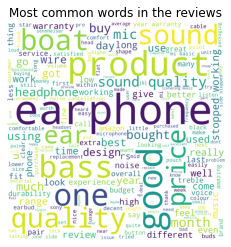

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [22]:
analyser = SentimentIntensityAnalyzer()

In [23]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [24]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound']

In [25]:
df['sentiment_score']=df['reviews'].apply(lambda x:compound_score(x)) 

In [26]:
df.head()

,reviews,sentiment_score
0,purchased boat earphone months ago sharing e...,0.9922
1,one best pair earphone price sound quality am...,0.9911
2,build quality durability wire length tan...,0.8555
3,bought sept satisfied purchase get wrong s...,-0.5037
4,price rs worth cost previously used boat bas...,0.6793


In [27]:
def sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [35]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment(x))

In [29]:
df.head()

,reviews,sentiment_score,review_category
0,purchased boat earphone months ago sharing e...,0.9922,positive
1,one best pair earphone price sound quality am...,0.9911,positive
2,build quality durability wire length tan...,0.8555,positive
3,bought sept satisfied purchase get wrong s...,-0.5037,negative
4,price rs worth cost previously used boat bas...,0.6793,positive


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Reviews Category')

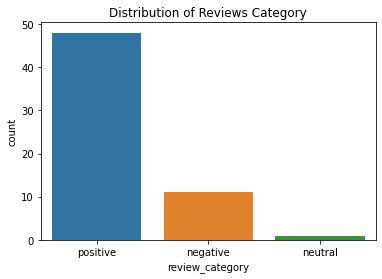

In [37]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")